In [ ]:
!pip install tensorflow==2.11.*

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 39.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 34.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 kB 34.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 21.5 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.2
    Uninstalling tensorboard-data-server-0.7.2:
      Successfully uninstalled tensorboard-data-server-0.7.2
  Att

In [ ]:
import tensorflow as tf

print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.15.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566170 sha256=9d21ed18798e8c85e5649efb15f22e15ffe167ce6732398a75e34608461976ec
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [ ]:
from lime import lime_image
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load the model
model = load_model('/content/drive/MyDrive/deepfake/deepfake-detection-model.h5')

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 414ms/step


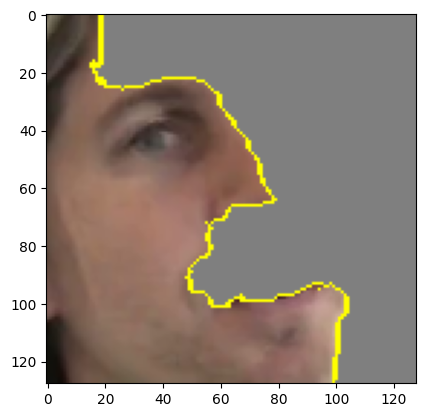

In [ ]:
from lime import lime_image
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt

preds = -1

# Define a function to preprocess images for the model
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(128, 128))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x

# Define a function to predict with the model
def predict_fn(images):
    preds = model.predict(images)
    return preds

# Load an example image
image_path = '/content/aagfhgtpmv_0.png'
x = preprocess_image(image_path)

# Create LIME explainer for image classification
explainer = lime_image.LimeImageExplainer()

# Explain the prediction
explanation = explainer.explain_instance(x[0], predict_fn, top_labels=5, hide_color=0, num_samples=1000)

# Show explanation
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.show()


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 410ms/step


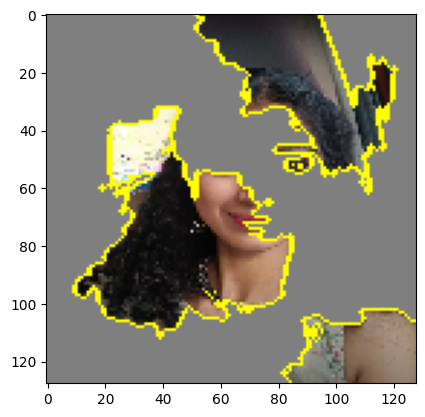

In [ ]:
from lime import lime_image
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt

# Define a function to preprocess images for the model
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(128, 128))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x

# Define a function to predict with the model
def predict_fn(images):
    preds = model.predict(images)
    return preds

# Load an example image
image_path = '/content/Screenshot 2024-04-12 120133.png'
x = preprocess_image(image_path)

# Create LIME explainer for image classification
explainer = lime_image.LimeImageExplainer()

# Explain the prediction
explanation = explainer.explain_instance(x[0], predict_fn, top_labels=5, hide_color=0, num_samples=1000)

# Show explanation
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.show()


total :  98
idx :  1


  0%|          | 0/200 [00:00<?, ?it/s]

1/1 [==============================] - 1s 678ms/step
idx :  2


  0%|          | 0/200 [00:00<?, ?it/s]

1/1 [==============================] - 1s 1s/step
idx :  3


  0%|          | 0/200 [00:00<?, ?it/s]

1/1 [==============================] - 1s 636ms/step
xai done


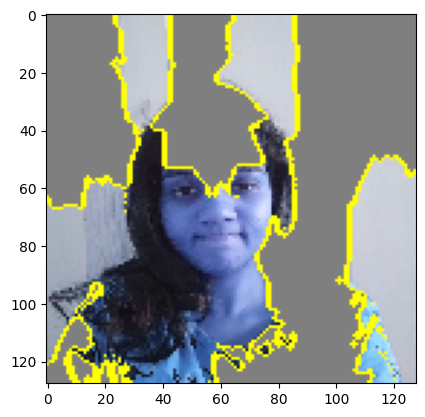

In [ ]:
import random
from tensorflow.keras.applications.resnet_v2 import preprocess_input
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

# Define a function to preprocess images for the model
def preprocess_image(frame):
    frame = cv2.resize(frame, (128, 128))
    x = np.expand_dims(frame, axis=0)
    x = preprocess_input(x)
    return x

# Define a function to predict with the model
def predict_fn(images):
    preds = model.predict(images)
    return preds

# Load an example video
video_path = '/content/drive/MyDrive/deepfake/real1.mp4'
cap = cv2.VideoCapture(video_path)

# Create LIME explainer for image classification
explainer = lime_image.LimeImageExplainer()

# Get the total number of frames
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print("total : ", total_frames)

# Select 5 random frames
selected_indices = random.sample(range(total_frames), 3)

# Explain predictions for each selected frame
for idx, selected_index in enumerate(selected_indices, start=1):
  print("idx : ", idx)
  # Seek to the selected frame
  cap.set(cv2.CAP_PROP_POS_FRAMES, selected_index)
  ret, frame = cap.read()
  if ret:
      # Preprocess the frame
      frame = cv2.resize(frame, (128, 128))
      x = np.expand_dims(frame, axis=0)
      x = preprocess_input(x)

      # Explain the prediction
      explanation = explainer.explain_instance(
          x[0], predict_fn, top_labels=5, hide_color=0, num_samples=200)

      # Show explanation
      temp, mask = explanation.get_image_and_mask(
          explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
      plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
      image_path = os.path.join('/content/output_dir/', f'{idx}.png')
      plt.savefig(image_path, format='png')

print("xai done")

# Release the video capture
cap.release()

In [ ]:
import random
total_frames = 50
selected_indices = random.sample(range(total_frames), 5)
for idx, selected_index in enumerate(selected_indices, start=1):
        print("idx : ", idx)
        print("selected_index ",selected_index)

idx :  1
selected_index  38
idx :  2
selected_index  2
idx :  3
selected_index  23
idx :  4
selected_index  27
idx :  5
selected_index  29
